# Sesión 6

## Alumno/a:


El objetivo de esta sesión es practicar la recursividad, las operaciones con arrays bidimensionales de numpy y la representación gráfica.

### Ejercicio 1. Recursividad

La *secuencia de Collatz* se define como aquella que:

* Empieza en un entero positivo: $n$.
* El siguiente término se calcula a partir del actual ($n_{i+1} = f(n_i)$) de la siguiente forma:
    * Si $n_i$ es par, $n_{i+1} = \frac{n_i}{2}$    
    * Si $n_i$ es impar, $n_{i+1} = (3 * n_i) + 1$

Por ejemplo, $collatz(5) = [5, 16, 8, 4, 2, 1]$

1. Define una ***función recursiva*** que devuelva una lista con la secuencia de Collatz de un número `n`.
2. Usa la función del apartado anterior para calcular las secuencias de Collatz de 11 y 2.
    

In [1]:
def collatz (n):
    if n <= 1:
        return [n]
    
    if n % 2 == 0: # par
        return [n] + collatz(n // 2)
    
    else: 
        return [n] + collatz(3 * n + 1)
    
print(collatz(11))
print(collatz(2))

[11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1]
[2, 1]


### Ejercicio 2. Matrices

1. Dado el siguiente sistema de ecuaciones, escribe una matriz de coeficientes  `M` y una de términos independientes `N` (ambas como arrays 2D de numpy). Imprime `M` y `N`.
$$ 
\begin{align*}
x + 2y + 5z + 4w&= 24\\
y-z  &= 1 \\
2x+2y &= 6 \\
-x+2y+3w &= 15
\end{align*}
$$
2. Resuelve el sistema de ecuaciones. Imprime el resultado.
3. Calcula el producto escalar de `M` por el resultado del sistema de ecuaciones del paso anterior. Imprime el resultado del producto y fíjate que es un vector que debe ser igual a `N`. 
4. Recorre las columnas de la matriz `M` e imprime el máximo de cada uno. (Puedes usar `max`).
5. Crea la matriz transpuesta de `M` y muestrala en la pantalla. Recorre la matriz transpuesta e imprime los valores pares de cada fila. Considera el cero como un número par. **Nota:** Define una *máscara* para la extracción de elementos que cumplen la condición de ser par.

In [2]:
import numpy as np
# Apartado 1

M = np.array( [# x y z w
    [1, 2, 5, 4],
    [0, 1, -1, 0],
    [2, 2, 0 , 0],
    [-1, 2, 0, 3]
])
N = np.array([
    [24],
    [1],
    [6],
    [15]
])
N = np.array([24, 1, 6, 25]) # También se puede definir así

print("Apartado 1")
print(M)
print(N)

Apartado 1
[[ 1  2  5  4]
 [ 0  1 -1  0]
 [ 2  2  0  0]
 [-1  2  0  3]]
[24  1  6 25]


In [3]:
# Apartado 2
print("Apartado 2")
resultado = np.linalg.solve(M, N)
print(resultado)

Apartado 2
[ 8.66666667 -5.66666667 -6.66666667 15.        ]


In [4]:
#Apartado 3
print("Apartado 3")

producto = M @ resultado
print(producto, N)

Apartado 3
[24.  1.  6. 25.] [24  1  6 25]


In [5]:
# Apartado 4
print("Apartado 4")
for j in range(len(M[0])):
    print(max(M[:, j]))

# Apartado 5
print("Apartado 5")
T = M.T
print(T)

#Opción 1: recorrido por filas
print("\na)")
for fila in T:
    mask = fila % 2 == 0
    print(fila[mask]) 

#Opción 2: recorrido por número de fila
print("\nb)")
for i in range(len(T[0])):
    fila = T[i]
    mask = fila % 2 == 0
    print(fila[mask])

Apartado 4
2
2
5
4
Apartado 5
[[ 1  0  2 -1]
 [ 2  1  2  2]
 [ 5 -1  0  0]
 [ 4  0  0  3]]

a)
[0 2]
[2 2 2]
[0 0]
[4 0 0]

b)
[0 2]
[2 2 2]
[0 0]
[4 0 0]


### Ejercicio 3. Representación de funciones

1. Representa gráficamente la función $f(x) = sin(x)$ entre 0 y 720º usando 200 valores, y colorea el área bajo la curva. El eje X debe leerse "Ángulo (rad)", y el Y, "Seno".
2. Representa gráficamente la función $f(x) = sin( 2 sin (2 sin (2 sin (x) ) ) )$ entre 0 y 720º  usando 200 valores.

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

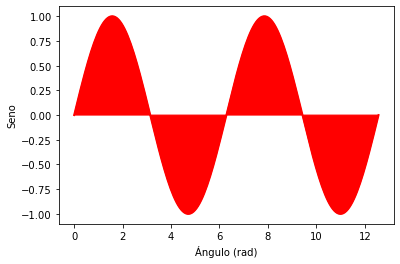

In [7]:
# Apartado 1
x = np.linspace(0, np.radians(720), 200)
y = np.sin(x)
#plot1 = plt.figure()
plt.plot(x, y, color = "red", linewidth = 2);
plt.fill(x, y, color = "red");
plt.xlabel("Ángulo (rad)");
plt.ylabel("Seno");

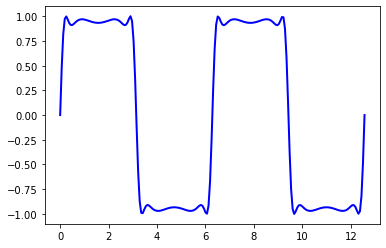

In [8]:
# Apartado 2
x = np.linspace(0, np.radians(720), 200)
y = np.sin(2 * np.sin(2 * np.sin(2 * np.sin(x))))
#plot2 = plt.figure();
plt.plot(x, y, color = "blue", linewidth = 2);

### Ejercicio 4 

En el ***experimento de Foucault***, un péndulo traza una rosa polar:

![Expermento de Foucault](https://upload.wikimedia.org/wikipedia/commons/a/a1/Foucault_pendulum_animated.gif)

Una rosa polar se puede representar en coordenadas polares con la siguiente función, donde `k` es un número real. 
$$
f(\theta) = cos(k \theta)
$$

1. Define una función que tome como argumento `k` y dibuje una rosa polar, con un color para los bordes y otro para el relleno. 
2. Dibuja la función para $k = 4$ y $k = 5$.

**Pista:** en el código de la función, debes crear una figura y añadir un único subplot, con coordenadas polares utilizando el argumento (`projection = "polar"`). En el subplot ya puedes dibujar la rosa.

**Notas:**

* Puedes ocultar los valores del eje "Y" de la siguiente forma `<subfigura>.set_yticklabels([])`. 
* El dominio de la función debería ser una circunferencia completa (en radianes).

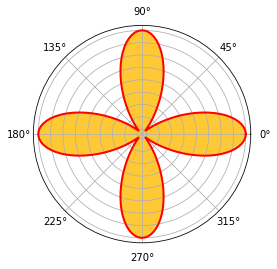

In [9]:
def rosa_polar (k):
    
    theta = np.linspace(0, 2*np.pi, 200)
    r = np.cos(k*theta)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection="polar")
   
    """
    #Para que fuese una verdadera rosa polar, se deberían usar estas líneas:
    ax.plot(theta + (r < 0)*np.pi, abs(r), color="red", linewidth=2)
    ax.fill(theta + (r < 0)*np.pi, abs(r), color="#ffc936")
    """
    ax.plot(theta, r, color="red", linewidth=2)
    ax.fill(theta, r, color="#ffc936")
    ax.set_yticklabels([])
    
    plt.show()
    
rosa_polar(4)

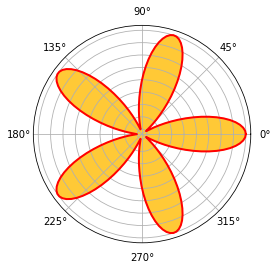

In [10]:
rosa_polar(5)